In [55]:
#from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import ast  # string of dictionary to dictionary (csv row of column to dictionary)
import pickle
from collections import Counter
#%matplotlib notebook
from matplotlib import pyplot as plt
import matplotlib as mpl
import scipy.stats
from numpy import sqrt
%matplotlib inline
# Visualitzarem només 3 decimals per mostra
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

import os
import warnings
import tempfile
import joblib

import random
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error

import time
import numpy as np

from pandas_datareader import data
import matplotlib.pyplot

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#imbalanced dataset
import tensorflow as tf
from tensorflow import keras

# basic models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import log_loss

# ensemble models
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.datasets import make_classification

from sklearn.preprocessing import StandardScaler

# feature selection
from sklearn.feature_selection import SelectKBest


# model selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
# skopt tuning
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from lightgbm import LGBMClassifier


# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

### Combinación 4 sets para predecir 2018

In [56]:
data2014 = load_dataset('/Users/carlo/Downloads/2014.csv')
data_values = data2014.values
data2014.dataframeName = '2014.csv'

x = data_values[:, :2]
y = data_values[:, 2]

print("Dimensionalitat de la BBDD:", data2014.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (3788, 64)
Dimensionalitat de les entrades X (3788, 2)
Dimensionalitat de l'atribut Y (3788,)


In [57]:
data2015 = load_dataset('/Users/carlo/Downloads/2015.csv')
data_values = data2015.values
data2015.dataframeName = '2015.csv'

x = data_values[:, :2]
y = data_values[:, 2]

print("Dimensionalitat de la BBDD:", data2015.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (4110, 56)
Dimensionalitat de les entrades X (4110, 2)
Dimensionalitat de l'atribut Y (4110,)


In [58]:
data2016 = load_dataset('/Users/carlo/Downloads/2016.csv')
data_values = data2016.values
data2016.dataframeName = '2016.csv'

x = data_values[:, :2]
y = data_values[:, 2]

print("Dimensionalitat de la BBDD:", data2016.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (4778, 60)
Dimensionalitat de les entrades X (4778, 2)
Dimensionalitat de l'atribut Y (4778,)


In [59]:
data2017 = load_dataset('/Users/carlo/Downloads/2017.csv')
data_values = data2017.values
data2017.dataframeName = '2017.csv'

x = data_values[:, :2]
y = data_values[:, 2]

print("Dimensionalitat de la BBDD:", data2017.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (4955, 62)
Dimensionalitat de les entrades X (4955, 2)
Dimensionalitat de l'atribut Y (4955,)


In [60]:
data2018 = load_dataset('/Users/carlo/Downloads/2018.csv')
data_values = data2018.values
data2018.dataframeName = '2018.csv'

x = data_values[:, :2]
y = data_values[:, 2]

print("Dimensionalitat de la BBDD:", data2018.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (4384, 64)
Dimensionalitat de les entrades X (4384, 2)
Dimensionalitat de l'atribut Y (4384,)


In [61]:
data2014['Year']=2014
data2015['Year']=2015
data2016['Year']=2016
data2017['Year']=2017
data2018['Year']=2018

In [62]:
# data2014 = data2014.drop(data2014_out.columns[0], axis = 1)
# data2015 = data2015.drop(data2015.columns[0], axis = 1)
# data2016 = data2016.drop(data2016.columns[0], axis = 1)
# data2017 = data2017.drop(data2017.columns[0], axis = 1)
# data2018 = data2018.drop(data2018.columns[0], axis = 1)

In [63]:
data2014.rename(columns={"2015 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
data2015.rename(columns={"2016 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
data2016.rename(columns={"2017 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
data2017.rename(columns={"2018 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
data2018.rename(columns={"2019 PRICE VAR [%]": "PRICE_VAR"},inplace=True)

In [234]:
# data2014.drop(['Sector'], axis=1, inplace=True)
# data2015.drop(['Sector'], axis=1, inplace=True)
# data2016.drop(['Sector'], axis=1, inplace=True)
# data2017.drop(['Sector'], axis=1, inplace=True)
# data2018.drop(['Sector'], axis=1, inplace=True)

In [64]:
data = pd.concat([data2014, data2015, data2016, data2017, data2018])

In [65]:
neg, pos = np.bincount(data['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 22015
    Positive: 12097 (54.95% of total)



In [ ]:
##data is balanced

In [66]:
data.describe()

,Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,EPS Diluted,...,Net Current Asset Value,Revenue Growth,EPS Growth,EPS Diluted Growth,Operating Cash Flow growth,Asset Growth,Net Income Growth,Weighted Average Shares Diluted Growth,SG&A Expenses Growth,Other Assets
count,2.201500e+04,2.201500e+04,2.201500e+04,2.201500e+04,2.201500e+04,2.201500e+04,2.201500e+04,2.201500e+04,22015.000000,22015.000000,...,1.822700e+04,14117.000000,14117.000000,14117.000000,14117.000000,14117.000000,9339.000000,9339.000000,9339.000000,4.384000e+03
mean,3.240866e+09,1.331514e+09,5.830680e+08,9.269359e+08,4.038410e+08,3.333421e+08,2.575067e+08,2.597281e+08,0.538039,0.507190,...,-3.547590e+09,0.134823,0.212473,0.208383,0.214640,0.136706,0.181249,0.109572,0.119122,2.873871e+08
std,7.026311e+09,2.989108e+09,1.272201e+09,1.994458e+09,9.707529e+08,8.410364e+08,6.517646e+08,6.628414e+08,3.719996,3.698596,...,7.939174e+09,0.330104,1.600160,1.595137,1.218525,0.347898,1.841186,0.261980,0.230599,7.787843e+08
min,0.000000e+00,0.000000e+00,8.214736e+05,3.605659e+06,-2.829900e+08,-4.372910e+08,-3.709407e+08,-3.754506e+08,-20.936000,-20.900000,...,-4.248805e+10,-0.549525,-5.000000,-5.000000,-2.854805,-0.388341,-5.787725,-0.077861,-0.263990,-7.302350e+07
25%,6.694950e+07,3.470300e+07,2.000000e+07,4.073450e+07,-2.965988e+06,-6.475500e+06,-6.425528e+06,-7.222500e+06,-0.310000,-0.310000,...,-3.369175e+09,0.000000,-0.225500,-0.222200,-0.204100,-0.016300,-0.291800,0.000000,0.000000,2.536250e+06
50%,5.283800e+08,2.316100e+08,1.022700e+08,1.896090e+08,4.550000e+07,3.307600e+07,2.724900e+07,2.555700e+07,0.753191,0.732413,...,-3.220000e+08,0.078665,0.177400,0.177400,0.104700,0.068200,0.080600,0.016500,0.085200,2.178250e+07
75%,2.559751e+09,1.144519e+09,5.471440e+08,8.959480e+08,3.335540e+08,2.828565e+08,2.442157e+08,2.353855e+08,1.910000,1.880000,...,1.506259e+07,0.186285,0.560700,0.556000,0.371966,0.150500,0.569110,0.092900,0.155800,1.457000e+08
max,3.991236e+10,1.598094e+10,6.759555e+09,1.092655e+10,5.186600e+09,4.502600e+09,3.751480e+09,3.819976e+09,8.802200,8.560000,...,7.651677e+08,1.665533,6.355872,6.259282,4.897944,1.887208,7.158937,1.352802,1.127809,3.999250e+09


In [67]:
features = ['Year','Revenue', 'EPS', 'EBITDA Margin', 'returnOnEquity', 'Operating Income Growth', 'Sector','Class', 'Total assets', 'Net Profit Margin']
data = data[features]

In [68]:
data = pd.get_dummies(data)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(0)

In [69]:
# Train Year: 2014 - 2017
# Test Year:  2018
all_year = set(data['Year'].unique())
test_year = {2018}
train_year = all_year - test_year
print("train_year:", train_year)
print("test_year:", test_year)

len(train_year), len(test_year), len(all_year)

train = data[data['Year'].isin(train_year)]
test = data[data['Year'].isin(test_year)]

train['Class'].value_counts()

class_ratio = len(train[train['Class']==1]) / len(train.index)
class_ratio

len(test) / len(data)
len(train) / len(data)

train_year: {2016, 2017, 2014, 2015}
test_year: {2018}


0.8008630479218715

In [70]:
train.describe()

,Year,Revenue,EPS,EBITDA Margin,returnOnEquity,Operating Income Growth,Class,Total assets,Net Profit Margin,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
count,17631.000000,1.763100e+04,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,1.763100e+04,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000
mean,2015.618229,3.191715e+09,0.411635,-0.186084,-0.002259,0.054729,0.513811,9.287365e+09,-0.377163,0.060292,0.020135,0.111338,0.041291,0.054790,0.220351,0.147638,0.124383,0.055754,0.140491,0.023538
std,1.108092,6.952424e+09,3.884648,1.530192,0.269289,1.240243,0.499823,2.043034e+10,1.837759,0.238033,0.140466,0.314559,0.198968,0.227576,0.414495,0.354751,0.330028,0.229453,0.347506,0.151609
min,2014.000000,0.000000e+00,-20.936000,-13.447960,-1.608794,-4.851058,0.000000,1.015943e+07,-11.601316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,6.724900e+07,-0.300000,0.000000,0.000000,-0.223550,0.000000,2.344610e+08,-0.019137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,5.303210e+08,0.760000,0.000000,0.000000,0.078700,1.000000,1.397045e+09,0.052500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,2.559751e+09,1.835826,0.139000,0.060914,0.323201,1.000000,7.555626e+09,0.127500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,3.991236e+10,8.731780,0.829330,0.985215,4.662180,1.000000,1.089924e+11,0.528173,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
features2 = ['Year','Revenue', 'EPS', 'EBITDA Margin', 'returnOnEquity', 'Operating Income Growth', 'Total assets', 'Net Profit Margin']

X_train = train[features2]
X_test = test[features2]
y_train = train['Class'].values.ravel()
y_test = test['Class'].values.ravel()
print(y_train)

[0 0 1 ... 0 0 0]


In [72]:
X_train=X_train.replace([np.inf, -np.inf], np.nan)
X_train=X_train.fillna(0)
X_train.isnull().values.any()
train.describe()

,Year,Revenue,EPS,EBITDA Margin,returnOnEquity,Operating Income Growth,Class,Total assets,Net Profit Margin,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
count,17631.000000,1.763100e+04,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,1.763100e+04,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000,17631.000000
mean,2015.618229,3.191715e+09,0.411635,-0.186084,-0.002259,0.054729,0.513811,9.287365e+09,-0.377163,0.060292,0.020135,0.111338,0.041291,0.054790,0.220351,0.147638,0.124383,0.055754,0.140491,0.023538
std,1.108092,6.952424e+09,3.884648,1.530192,0.269289,1.240243,0.499823,2.043034e+10,1.837759,0.238033,0.140466,0.314559,0.198968,0.227576,0.414495,0.354751,0.330028,0.229453,0.347506,0.151609
min,2014.000000,0.000000e+00,-20.936000,-13.447960,-1.608794,-4.851058,0.000000,1.015943e+07,-11.601316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,6.724900e+07,-0.300000,0.000000,0.000000,-0.223550,0.000000,2.344610e+08,-0.019137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,5.303210e+08,0.760000,0.000000,0.000000,0.078700,1.000000,1.397045e+09,0.052500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,2.559751e+09,1.835826,0.139000,0.060914,0.323201,1.000000,7.555626e+09,0.127500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,3.991236e+10,8.731780,0.829330,0.985215,4.662180,1.000000,1.089924e+11,0.528173,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17631, 8), (4384, 8), (17631,), (4384,))

In [76]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
print(feature_names)

['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7']


### Standarize

In [80]:
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns.values)

X_train.describe()

,Year,Revenue,EPS,EBITDA Margin,returnOnEquity,Operating Income Growth,Total assets,Net Profit Margin
count,1.763100e+04,1.763100e+04,1.763100e+04,1.763100e+04,1.763100e+04,1.763100e+04,1.763100e+04,1.763100e+04
mean,-6.255373e-14,1.307130e-16,-1.587929e-16,3.083668e-15,4.839968e-17,-9.967638e-16,-1.277314e-16,-3.253011e-16
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-1.460416e+00,-4.590924e-01,-5.495540e+00,-8.667052e+00,-5.966012e+00,-3.955616e+00,-4.541026e-01,-6.107696e+00
25%,-5.579383e-01,-4.494194e-01,-1.831968e-01,1.216119e-01,8.388507e-03,-2.243809e-01,-4.431234e-01,1.948223e-01
50%,3.445397e-01,-3.828117e-01,8.967996e-02,1.216119e-01,8.388507e-03,1.932820e-02,-3.862170e-01,2.338040e-01
75%,1.247018e+00,-9.090098e-02,3.666307e-01,2.124527e-01,2.345981e-01,2.164737e-01,-8.476548e-02,2.746158e-01
max,1.247018e+00,5.281853e+00,2.141862e+00,6.636050e-01,3.667073e+00,3.715063e+00,4.880385e+00,4.926446e-01


### Cross-Validation model evaluation

In [28]:
num_folds = 10
seed = 743
scoring = 'roc_auc'  #We use it for our imbalanced dataset
models = []
# basic models
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('SGD', SGDClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GAUS', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QD', QuadraticDiscriminantAnalysis()))

# ensemble models
models.append(('XGB', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ADA', AdaBoostClassifier()))

models.append(('ET', ExtraTreesClassifier()))

# KFolds for model selection:
results, names = [], []
for name, model in tqdm(models):
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("Model: {:>4} Mean: {:>8} Std: {:>8}".format(name, cv_results.mean(), cv_results.std()))

  6%|▋         | 1/16 [00:00<00:07,  2.14it/s]

Model:   LR Mean: 0.622630682392112 Std: 0.013759423544343726


 12%|█▎        | 2/16 [00:01<00:07,  1.75it/s]

Model:  LDA Mean: 0.6229012401812968 Std: 0.013633345209430119


 19%|█▉        | 3/16 [00:04<00:22,  1.76s/it]

Model:  KNN Mean: 0.6947991394591154 Std: 0.008827175563848088


 25%|██▌       | 4/16 [00:07<00:28,  2.34s/it]

Model: CART Mean: 0.5993845888113258 Std: 0.006031173240642601


 31%|███▏      | 5/16 [00:07<00:17,  1.60s/it]

Model:   NB Mean: 0.6712831112862514 Std: 0.011027633681882757


 38%|███▊      | 6/16 [08:23<28:14, 169.45s/it]

Model:  SVM Mean: 0.7279670296244201 Std: 0.012153744512992514


 44%|████▍     | 7/16 [08:25<17:12, 114.68s/it]

Model:  SGD Mean: 0.6147033720246441 Std: 0.014388365732878682


 56%|█████▋    | 9/16 [09:44<08:18, 71.22s/it] 

Model:   GB Mean: 0.7548988203968161 Std: 0.010283804111743592
Model: GAUS Mean: 0.6712831112862514 Std: 0.011027633681882757


 69%|██████▉   | 11/16 [09:45<02:51, 34.36s/it]

Model:  LDA Mean: 0.6229012401812968 Std: 0.013633345209430119
Model:   QD Mean: 0.6621180917326982 Std: 0.010377415094074898


C:\Users\carlo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:01:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\carlo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\carlo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\carlo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\carlo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\carlo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\carlo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\carlo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\carlo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\carlo\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 75%|███████▌  | 12/16 [10:05<02:00, 30.06s/it]

Model:  XGB Mean: 0.7463325606881439 Std: 0.008968123549569426


 81%|████████▏ | 13/16 [10:09<01:06, 22.13s/it]

Model: LGBM Mean: 0.7580637099640534 Std: 0.010279413417712236


 88%|████████▊ | 14/16 [11:22<01:14, 37.48s/it]

Model:   RF Mean: 0.7495956291135414 Std: 0.009241633393969126


 94%|█████████▍| 15/16 [11:43<00:32, 32.46s/it]

Model:  ADA Mean: 0.7448662446714047 Std: 0.012408135046625135


100%|██████████| 16/16 [12:26<00:00, 46.63s/it]

Model:   ET Mean: 0.7489257169106474 Std: 0.009396474488456628


In [ ]:
#BEST LGBM,GB, RF, ET 

### Without Cross-Validation

In [121]:
classifiers = [
    LogisticRegression(),
    LogisticRegression(penalty = 'l2'),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 69.2974%
Log Loss: 0.6811311633689764
LogisticRegression
****Results****
Accuracy: 69.2974%
Log Loss: 0.6811311633689764
KNeighborsClassifier
****Results****
Accuracy: 54.1515%
Log Loss: 4.785332801753973
SVC
****Results****
Accuracy: 69.2974%
Log Loss: 0.6797497692608767
DecisionTreeClassifier
****Results****
Accuracy: 41.1268%
Log Loss: 20.11727678523784
RandomForestClassifier
****Results****
Accuracy: 38.8914%
Log Loss: 0.8117516553261362
AdaBoostClassifier
****Results****
Accuracy: 31.1816%
Log Loss: 0.6946923636858754
GradientBoostingClassifier
****Results****
Accuracy: 32.8467%
Log Loss: 0.8047296722115598
GaussianNB
****Results****
Accuracy: 41.9480%
Log Loss: 0.677854202164906
LinearDiscriminantAnalysis
****Results****
Accuracy: 30.7026%
Log Loss: 0.8021485331746878
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 34.8312%
Log Loss: 0.8074352532112613
GradientBoostingClassifier
****Results****
Accuracy: 32.8467%
Log Loss: 0.80

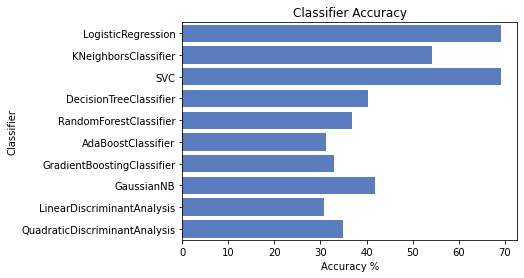

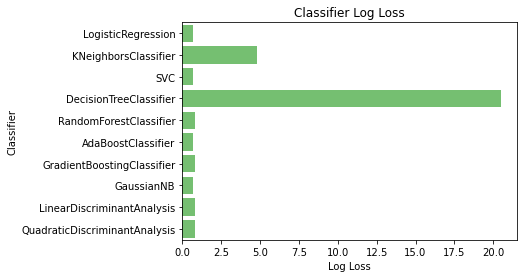

In [100]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

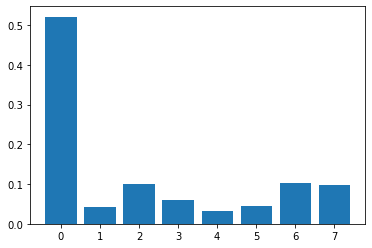

In [83]:
from matplotlib import pyplot# define the model
model = GradientBoostingClassifier()
# fit the model
model.fit(X_train, y_train)

# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [84]:
model = model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.34922445255474455


In [85]:
results = model.predict(X_test)

l = [y_train[i] == results[i] for i in range(len(y))]
print('Acuracy of :',(l.count(True))/len(y))

Acuracy of : 0.5362682481751825


### K-Best Features

In [87]:
model = LGBMClassifier()  # also eval:error

from imblearn.pipeline import Pipeline

fs = SelectKBest()  # f-classif by default
pipeline = Pipeline(steps=[('sel',fs), ('GB', model)])
cv = KFold(n_splits=2, random_state=743, shuffle=True)

# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(1, X_train.shape[1])]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='roc_auc', n_jobs=-1, cv=cv, verbose=1)
# perform the search
results = search.fit(X_train, y_train)

# summarize best
print('Best AUC: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Fitting 2 folds for each of 7 candidates, totalling 14 fits
Best AUC: 0.748
Best Config: {'sel__k': 7}
>0.694 with: {'sel__k': 1}
>0.722 with: {'sel__k': 2}
>0.734 with: {'sel__k': 3}
>0.737 with: {'sel__k': 4}
>0.740 with: {'sel__k': 5}
>0.746 with: {'sel__k': 6}
>0.748 with: {'sel__k': 7}


In [ ]:
### 7 así que nos quedamos con todo el dataset

### Accuracy Score

In [88]:
#implementación accuracy_score
model = LGBMClassifier()
model = model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))
print(f1_score(y_test, model.predict(X_test), average = None))  ##no me sirve porque mis datos no están balanceados
#average_precision_score(y_v, KNN.predict_proba(x_v))

0.3601733576642336
[0.4617156  0.21141411]


In [89]:
print(classification_report(y_test, model.predict(X_test), labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.31      0.89      0.46      1346
           1       0.72      0.12      0.21      3038

    accuracy                           0.36      4384
   macro avg       0.52      0.51      0.34      4384
weighted avg       0.60      0.36      0.29      4384



### Hyperparameters for Gradient Boosting

In [144]:
parameters = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}
k = 5


models = GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)

mod = GridSearchCV(models, parameters, cv = k)
mod.fit(X_train, y_train)
results = mod.predict(X_test)
l= [y_test[i] == results[i] for i in range(len(y_test))]
print('Acuracy of :',(l.count(True))/len(y_test))
print(mod.best_params_)
print(classification_report(y_test, results))

Acuracy of : 0.30702554744525545
{'learning_rate': 0.001, 'n_estimators': 250}
              precision    recall  f1-score   support

           0       0.31      1.00      0.47      1346
           1       0.00      0.00      0.00      3038

    accuracy                           0.31      4384
   macro avg       0.15      0.50      0.23      4384
weighted avg       0.09      0.31      0.14      4384



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
from sklearn.model_selection import GridSearchCV


models = GradientBoostingClassifier(learning_rate=0.001,n_estimators=250, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)

mod = GridSearchCV(models, p_test2, cv = 5)
mod.fit(X_train, y_train)
results = mod.predict(X_test)
l= [y_test[i] == results[i] for i in range(len(y_test))]
print('Acuracy of :',(l.count(True))/len(y_test))
print(mod.best_params_)
print(classification_report(y_test, results))

Acuracy of : 0.30702554744525545
{'max_depth': 2}
              precision    recall  f1-score   support

           0       0.31      1.00      0.47      1346
           1       0.00      0.00      0.00      3038

    accuracy                           0.31      4384
   macro avg       0.15      0.50      0.23      4384
weighted avg       0.09      0.31      0.14      4384



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

models = GradientBoostingClassifier(learning_rate=0.001,n_estimators=250, max_depth=2, subsample=1,max_features='sqrt', random_state=10)

mod = GridSearchCV(models, p_test4, cv = 5)
mod.fit(X_train, y_train)
results = mod.predict(X_test)
l= [y_test[i] == results[i] for i in range(len(y_test))]
print('Acuracy of :',(l.count(True))/len(y_test))
print(mod.best_params_)
print(classification_report(y_test, results))

Acuracy of : 0.30702554744525545
{'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.31      1.00      0.47      1346
           1       0.00      0.00      0.00      3038

    accuracy                           0.31      4384
   macro avg       0.15      0.50      0.23      4384
weighted avg       0.09      0.31      0.14      4384



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
p_test5 = {'max_features':[2,3,4,5,6,7]}
models = GradientBoostingClassifier(learning_rate=0.001,n_estimators=250, max_depth=2, min_samples_split=2, min_samples_leaf=1,subsample=1, random_state=10)

mod = GridSearchCV(models, p_test5, cv = 5)
mod.fit(X_train, y_train)
results = mod.predict(X_test)
l= [y_test[i] == results[i] for i in range(len(y_test))]
print('Acuracy of :',(l.count(True))/len(y_test))
print(mod.best_params_)
print(classification_report(y_test, results))

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 596, in fit
    monitor,
  File "C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 672, in _fit_stages
    X_csr,
  File "C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 246, in _f

Acuracy of : 0.30702554744525545
{'max_features': 2}
              precision    recall  f1-score   support

           0       0.31      1.00      0.47      1346
           1       0.00      0.00      0.00      3038

    accuracy                           0.31      4384
   macro avg       0.15      0.50      0.23      4384
weighted avg       0.09      0.31      0.14      4384



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

models = GradientBoostingClassifier(learning_rate=0.001,n_estimators=250, max_depth=2, min_samples_split=2, min_samples_leaf=1,max_features=2, random_state=10)

mod = GridSearchCV(models, p_test6, cv = 5)
mod.fit(X_train, y_train)
results = mod.predict(X_test)
l= [y_test[i] == results[i] for i in range(len(y_test))]
print('Acuracy of :',(l.count(True))/len(y_test))
print(mod.best_params_)
print(classification_report(y_test, results))

Acuracy of : 0.30702554744525545
{'subsample': 1}
              precision    recall  f1-score   support

           0       0.31      1.00      0.47      1346
           1       0.00      0.00      0.00      3038

    accuracy                           0.31      4384
   macro avg       0.15      0.50      0.23      4384
weighted avg       0.09      0.31      0.14      4384



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
gb_opt = GradientBoostingClassifier(learning_rate=0.001,n_estimators=250, max_depth=2, min_samples_split=2, min_samples_leaf=1,max_features=2, random_state=10)

kfold = KFold(n_splits=10, random_state=743, shuffle=True) 
cv_results = cross_val_score(gb_opt, X_train, y_train, cv=kfold, scoring='roc_auc')

In [91]:
print("GB_opt Mean: {:>8} Std: {:>8}".format(cv_results.mean(), cv_results.std()))

GB_opt Mean: 0.7397539374107336 Std: 0.012274821502417274


In [ ]:
###lower than CV

### Hyperparameters for LGBM

In [92]:
def objective(trial, X, y):
    param_grid = {
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
        "metric" : "auc"
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgb.LGBMClassifier(objective="binary", **param_grid, verbosity=-1)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="auc",
            early_stopping_rounds=100,
            verbose=-1
        )
        preds = model.predict_proba(X_test)
        cv_scores[idx] = roc_auc_score(y_test, preds[:, 1])

    return np.mean(cv_scores)

In [93]:
import optuna
# for lgbm pruning (not used in v1)
from optuna.integration import LightGBMPruningCallback

optuna.logging.set_verbosity(optuna.logging.WARNING)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
    func = lambda trial: objective(trial, X_train, y_train)
    study.optimize(func, n_trials=100, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=2300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2300
[LightGBM] [Warning] min_gain_to_split is set=8.815992244753435, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.815992244753435
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=2

In [94]:
study.trials_dataframe().sort_values(by='value',ascending=False)

,number,value,datetime_start,datetime_complete,duration,params_bagging_fraction,params_bagging_freq,params_feature_fraction,params_lambda_l1,params_lambda_l2,params_learning_rate,params_max_depth,params_min_data_in_leaf,params_min_gain_to_split,params_n_estimators,params_num_leaves,state
96,96,0.756162,2022-01-08 11:18:58.831699,2022-01-08 11:19:01.075192,0 days 00:00:02.243493,0.4,1,0.7,5,5,0.050500,6,200,0.609299,10000,2740,COMPLETE
63,63,0.755960,2022-01-08 11:17:36.224663,2022-01-08 11:17:39.087024,0 days 00:00:02.862361,0.5,1,0.7,5,65,0.054469,5,200,0.565867,10000,2620,COMPLETE
61,61,0.755428,2022-01-08 11:17:27.946185,2022-01-08 11:17:32.435196,0 days 00:00:04.489011,0.4,1,0.7,0,70,0.026471,4,200,0.612267,10000,2780,COMPLETE
47,47,0.754928,2022-01-08 11:17:03.290699,2022-01-08 11:17:05.149561,0 days 00:00:01.858862,0.3,1,0.9,0,0,0.061048,4,200,0.989102,10000,2840,COMPLETE
62,62,0.754627,2022-01-08 11:17:32.437191,2022-01-08 11:17:36.221685,0 days 00:00:03.784494,0.4,1,0.7,5,65,0.044044,4,200,0.548429,10000,2760,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,28,0.500000,2022-01-08 11:16:27.934178,2022-01-08 11:16:28.263135,0 days 00:00:00.328957,0.9,1,0.7,0,25,0.090037,7,9400,8.206134,10000,2640,COMPLETE
39,39,0.500000,2022-01-08 11:16:45.608473,2022-01-08 11:16:46.011126,0 days 00:00:00.402653,0.3,1,0.8,5,100,0.115214,3,2200,0.078909,10000,3000,COMPLETE
49,49,0.500000,2022-01-08 11:17:06.316441,2022-01-08 11:17:06.679470,0 days 00:00:00.363029,0.2,1,0.7,5,0,0.023558,6,8500,0.015771,10000,2560,COMPLETE
56,56,0.500000,2022-01-08 11:17:17.703685,2022-01-08 11:17:18.112591,0 days 00:00:00.408906,0.2,1,0.7,5,5,0.103406,6,1700,0.925728,10000,2700,COMPLETE


In [114]:
study.trials_dataframe().sort_values(by='value',ascending=False).head(1)

,number,value,datetime_start,datetime_complete,duration,params_bagging_fraction,params_bagging_freq,params_feature_fraction,params_lambda_l1,params_lambda_l2,params_learning_rate,params_max_depth,params_min_data_in_leaf,params_min_gain_to_split,params_n_estimators,params_num_leaves,state
96,96,0.756162,2022-01-08 11:18:58.831699,2022-01-08 11:19:01.075192,0 days 00:00:02.243493,0.4,1,0.7,5,5,0.0505,6,200,0.609299,10000,2740,COMPLETE


In [ ]:
##numer 96 is our best hyperparamter combination

In [121]:
# lgb_params_optuna = study.best_params

In [129]:
lgbm_opt = LGBMClassifier(n_estimators=10000,
        learning_rate = 0.0505,
        num_leaves = 2740,
        max_depth = 6,
        min_data_in_leaf = 200,
        lambda_l1 = 5,
        lambda_l2 = 5,
        min_gain_to_split=0.609299,
        bagging_fraction = 0.4,
        bagging_freq = 1,
        feature_fraction= 0.7,
        metric = "auc")
#lgbm_opt.set_params(verbosity=-1)

kfold = KFold(n_splits=10, random_state=743, shuffle=True)
cv_results = cross_val_score(lgbm_opt, X_train, y_train, cv=kfold, scoring='roc_auc')

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=0.609299, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.609299
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20

In [130]:
print("LGBM_opt Mean: {:>8} Std: {:>8}".format(cv_results.mean(), cv_results.std()))

LGBM_opt Mean: 0.7373991985830484 Std: 0.009232010908709527


In [ ]:
###WE GET OUR CV SCORE TO 0.749 ---> LOWER THAN 0.750

### Predictions

In [40]:
class_rand = [0, 1]
balanced_rand = random.choices(class_rand, k=len(y_test), weights=[0.776, 0.224])
imbalanced_rand = random.choices(class_rand, k=len(y_test), weights=[0.776, 0.224])  # weights from EDA

In [41]:
print(classification_report(y_test, balanced_rand))

              precision    recall  f1-score   support

           0       0.31      0.78      0.44      1346
           1       0.70      0.23      0.34      3038

    accuracy                           0.40      4384
   macro avg       0.50      0.50      0.39      4384
weighted avg       0.58      0.40      0.37      4384



In [42]:
print(classification_report(y_test, imbalanced_rand))

              precision    recall  f1-score   support

           0       0.31      0.78      0.44      1346
           1       0.70      0.23      0.35      3038

    accuracy                           0.40      4384
   macro avg       0.51      0.50      0.39      4384
weighted avg       0.58      0.40      0.38      4384



### With Gradient Boosting

Accuracy of the GBM on test set: 0.349
              precision    recall  f1-score   support

           0       0.32      0.96      0.47      1346
           1       0.81      0.08      0.15      3038

    accuracy                           0.35      4384
   macro avg       0.56      0.52      0.31      4384
weighted avg       0.65      0.35      0.25      4384



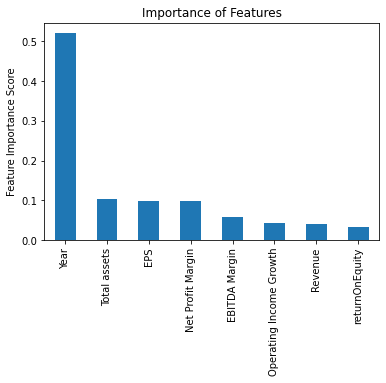

In [43]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model.score(X_test, y_test)))
pred=model.predict(X_test)
print(classification_report(y_test, pred))

In [44]:
y_pred_prob = model.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))

0.5826081618958276


In [45]:
gb_opt = GradientBoostingClassifier(learning_rate=0.001,n_estimators=250, max_depth=2, min_samples_split=2, min_samples_leaf=1,max_features=2, subsample=1,random_state=10)
gb_opt.fit(X_train, y_train)
y_pred = gb_opt.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.33      0.49      3828
           1       0.15      0.84      0.26       556

    accuracy                           0.39      4384
   macro avg       0.54      0.58      0.37      4384
weighted avg       0.83      0.39      0.46      4384



In [46]:
y_pred_prob = gb_opt.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))

0.6447640193018203


### With LGBM

Accuracy of the GBM on test set: 0.360
              precision    recall  f1-score   support

           0       0.31      0.89      0.46      1346
           1       0.72      0.12      0.21      3038

    accuracy                           0.36      4384
   macro avg       0.52      0.51      0.34      4384
weighted avg       0.60      0.36      0.29      4384



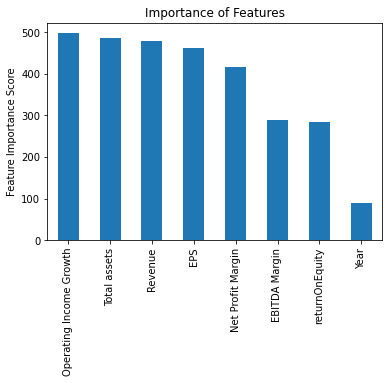

In [52]:
model=LGBMClassifier()
model.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model.score(X_test, y_test)))
pred=model.predict(X_test)
print(classification_report(y_test, pred))

In [53]:
y_pred_prob = model.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))

0.5386075534561234


In [127]:
lgb_opt = LGBMClassifier(n_estimators=10000,
        learning_rate = 0.0505,
        num_leaves = 2740,
        max_depth = 6,
        min_data_in_leaf = 200,
        lambda_l1 = 5,
        lambda_l2 = 5,
        min_gain_to_split=0.609299,
        bagging_fraction = 0.4,
        bagging_freq = 1,
        feature_fraction= 0.7,
        metric = "auc")
#lgb_opt.set_params(use_label_encoder=False)
lgb_opt.fit(X_train, y_train)

y_pred = lgb_opt.predict(X_test)
print(classification_report(y_pred, y_test))

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_gain_to_split is set=0.609299, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.609299
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
              precision    recall  f1-score   support

           0       0.84      0.33      0.47      3463
           1       0.23      0.77      0.36       921

    accuracy                  

In [128]:
y_pred_prob = lgb_opt.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_prob[:,1]))

0.6014553642959365
